<a href="https://colab.research.google.com/github/CiaranMaloy/audioautoencoder/blob/dataset-generation-fix/Test_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test Dataset

In [1]:
import sys
import os

# Detect Google Colab
if "google.colab" in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Detect Google Colab
if "google.colab" in sys.modules:
    print("Running in Google Colab...")
    os.system("git clone https://github.com/CiaranMaloy/audioautoencoder")
    os.chdir("/content/audioautoencoder/")
    os.system("git pull")
    os.system("git checkout dataset-generation-fix")
    os.system("git pull origin dataset-generation-fix")
    #os.system("pip install --upgrade torchmetrics")
else:
    print("Running locally...")
    os.system("git pull origin dataset-generation-fix")
    #os.system("pip install --upgrade torchmetrics")


Running in Google Colab...


In [3]:
import sys
sys.path.append('/content/audioautoencoder')
sys.path.append('/content/audioautoencoder/audioautoencoder')

Notes on testing:
1. SDR is missing as a metric

## Load Model

In [4]:
from audioautoencoder.models.UNetConv4 import *
from audioautoencoder.training import DenoisingLoader

In [5]:
import torch

In [6]:
IMPORT_TEST_NOISY = True
max_file_size_gb = 6

In [7]:
from audioautoencoder.datasets.utils import *
from audioautoencoder.data import *
from audioautoencoder.data_management import *
from audioautoencoder.generate_dataset import *

In [8]:
model_name = 'Testing'
SNRdB_load = [-10, 10]
SNRdB = [-10, 10] # SNR random range
#load_file = 'Autoencodermodel_earlystopping.pth'
load_file = 'Autoencodermodel_checkpoint.pth'

folder = 'remapped-signal-level'

output_path = f'/content/drive/MyDrive/Projects/ML_Projects/De-noising-autoencoder/Models_Comparison/Checkpoints_{model_name}_{SNRdB_load[0]}-{SNRdB_load[1]}/'
scaler_file = output_path + "scalers.pkl"  # Static filename since it's unique per run
os.makedirs(os.path.dirname(scaler_file), exist_ok=True)
source_folder = f"/content/drive/MyDrive/Datasets/Music-Noise/SNRdB_{folder}/SNRdB_{SNRdB[0]}-{SNRdB[1]}/"
source_path = source_folder + "train/"

In [9]:
destination_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/"

from google.colab import drive

if IMPORT_TEST_NOISY:
  if not os.path.exists(destination_path):
    combine_h5_files_spectrograms(source_path, destination_path, max_file_size_gb=max_file_size_gb)

Created new file: /content/SNRdB_-10-10/test/combined_000.h5


Processing:   0%|          | 0/204 [00:00<?, ?it/s]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   0%|          | 1/204 [00:42<2:23:38, 42.46s/it, samples=500, size=0.668 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   1%|          | 2/204 [01:33<2:40:37, 47.71s/it, samples=1000, size=1.336 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   1%|▏         | 3/204 [03:03<3:44:28, 67.01s/it, samples=1499, size=2.003 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   2%|▏         | 4/204 [03:40<3:03:08, 54.94s/it, samples=1999, size=2.672 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   2%|▏         | 5/204 [04:24<2:49:12, 51.02s/it, samples=2499, size=3.34 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   3%|▎         | 6/204 [05:09<2:41:42, 49.00s/it, samples=2998, size=4.007 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   3%|▎         | 7/204 [05:54<2:36:54, 47.79s/it, samples=3497, size=4.674 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   4%|▍         | 8/204 [06:46<2:40:23, 49.10s/it, samples=3997, size=5.342 GB]


Attempt 1 failed: Timeout after 20 seconds. Retrying in 3 seconds.


Processing:   4%|▍         | 8/204 [07:41<3:08:18, 57.64s/it, samples=4381, size=5.855 GB]


Finished combining files into 1 output files in /content/SNRdB_-10-10/test/


In [10]:
from audioautoencoder.datasets.utils import *

In [11]:
dataset_path = f"/content/SNRdB_{SNRdB[0]}-{SNRdB[1]}/test/combined_000.h5"

In [12]:
if os.path.exists(scaler_file):
    print("Loading existing scalers...")
    scalers = load_scalers(scaler_file)
else:
    print("Training new scalers...")
    scalers = train_scalers_no_features(dataset_path, sample_size=8000)
    save_scalers(scalers, scaler_file)

Training new scalers...
Training scalers for separation dataset
Training Spectrogram...
Input features
Target features


In [13]:
if IMPORT_TEST_NOISY:
    print("Loading existing scalers...")
    scalers = load_scalers(scaler_file)
    test_loader = ChannelDatasetLoader(
          dataset_path=dataset_path,
          scalers=scalers,
          output_time_length=175,
          channels=1,
          snr_db=SNRdB,
          subset=False,
          batch_size=4
      )

    print(f"Training set size: {len(test_loader.train_dataset)}")
    print(f"Validation set size: {len(test_loader.val_dataset)}")

Loading existing scalers...
Training set size: 3504
Validation set size: 877
Training set size: 3504
Validation set size: 877


In [14]:
import os
os.system("pip install --upgrade torchmetrics")

0

In [15]:
from audioautoencoder.testing import *

## Test Dataset

In [16]:
df_eval = test_dataset(test_loader.train_loader, scalers)

Testing: 100%|██████████| 876/876 [04:32<00:00,  3.22batch/s]


In [23]:
df = df_eval.copy()

In [24]:
import pandas as pd
# 1. Split filenames (assuming they are bytes)
df["music_filename"] = df["filename"].apply(lambda x: x[0].decode('utf-8') if isinstance(x[0], bytes) else x[0])
df["noise_filename"] = df["filename"].apply(lambda x: x[1].decode('utf-8') if isinstance(x[1], bytes) else x[1])
df.drop(columns=["filename"], inplace=True)

# 2. Flatten metadata dictionary
metadata_expanded = df["metadata"].apply(pd.Series)
df = pd.concat([df.drop(columns=["metadata"]), metadata_expanded], axis=1)


In [25]:
def get_class_from_filename(filename, classes):
    for keyword in classes:
        if keyword in filename:
            return keyword
    return 'Unknown'  # Default if no match found

classes = ['mixture', 'vocals', 'drums', 'guitar', 'bass', 'piano', 'electric_guitar', 'acoustic_guitar', 'synthesizer', 'strings', 'brass']
df['audio_class'] = df['music_filename'].apply(lambda x: get_class_from_filename(x, classes))

classes = ['0707', 'Rain', 'Crowd', 'Water', 'Ice']
df['noise_class'] = df['noise_filename'].apply(lambda x: get_class_from_filename(x, classes))

In [27]:
print(df.head())

   instance  l1_invstar    snr_db    in_max  in_min   in_mean    in_std  \
0         0    0.109808  4.887140  1.637864     0.0  0.283521  0.285647   
1         1    0.118068  8.020289  1.545193     0.0  0.661570  0.371738   
2         2    0.411612 -9.011421  1.723216     0.0  0.503963  0.357673   
3         3    0.329472 -5.551241  1.620204     0.0  0.742671  0.338819   
4         4    0.432521 -2.769184  2.162281     0.0  0.633686  0.245885   

     in_var  in_median  in_range  ...  \
0  0.081594   0.226715  1.637864  ...   
1  0.138189   0.737936  1.545193  ...   
2  0.127930   0.502391  1.723216  ...   
3  0.114798   0.771871  1.620204  ...   
4  0.060459   0.633929  2.162281  ...   

                                            filename    snr_db    hf_shape  \
0  [b'/content/drive/MyDrive/Datasets/Music/MUSDB...  4.887140  (233, 175)   
1  [b'/content/drive/MyDrive/Datasets/Music/MUSDB...  8.020289  (233, 175)   
2  [b'/content/drive/MyDrive/Datasets/Music/MUSDB... -9.011421  (233

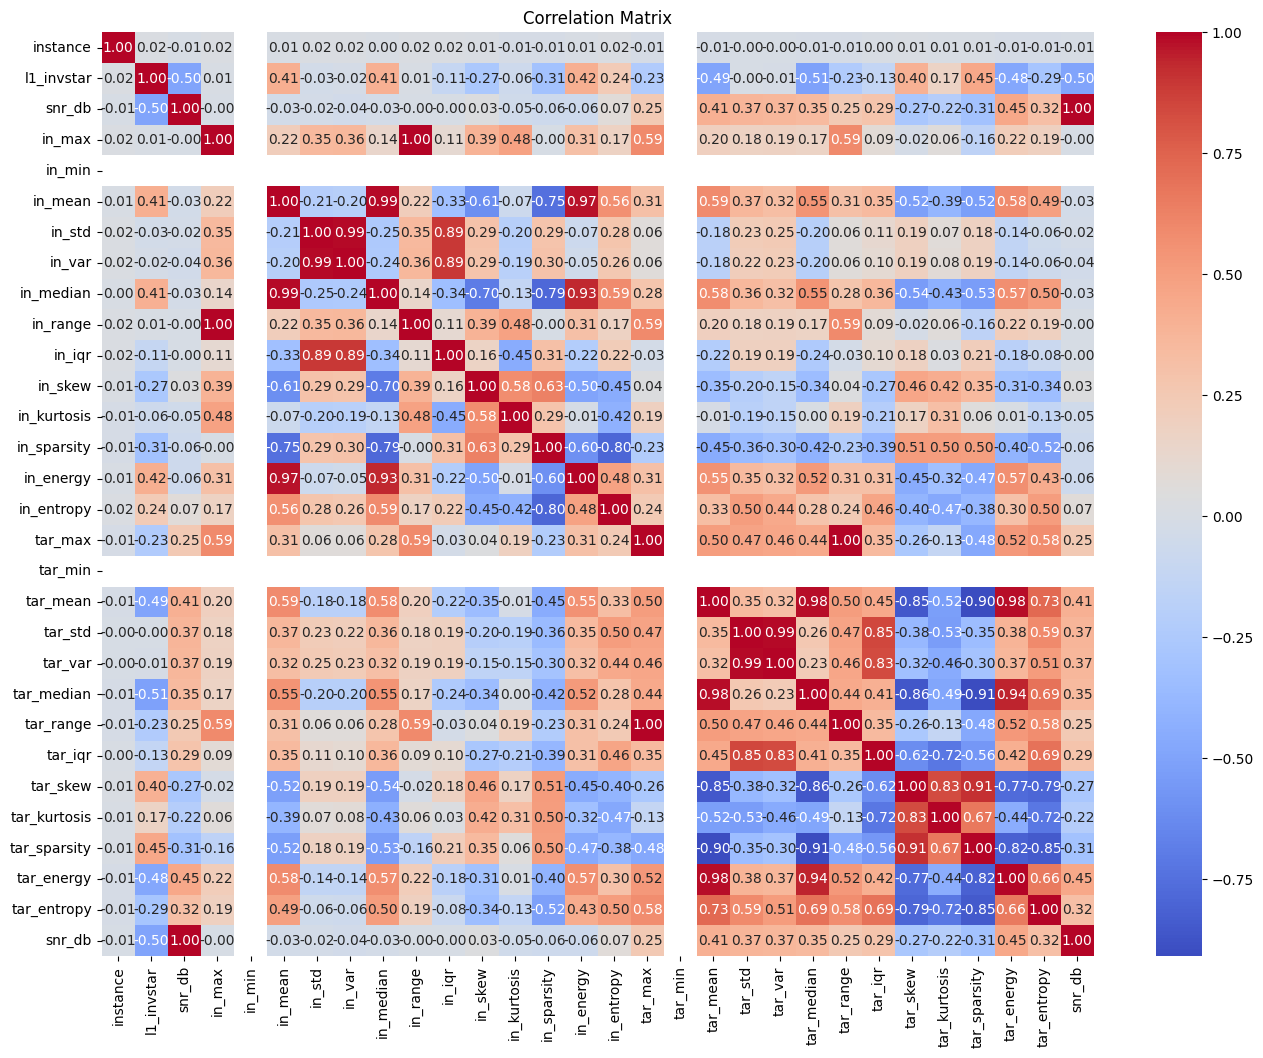

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only numerical columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [30]:
print(df['audio_class'].value_counts())
print(df['noise_class'].value_counts())

from scipy.stats import entropy

entropy_audio = entropy(df["audio_class"].value_counts(normalize=True))
entropy_noise = entropy(df["noise_class"].value_counts(normalize=True))
print(f"Audio class entropy: {entropy_audio:.3f}")
print(f"Noise class entropy: {entropy_noise:.3f}")


audio_class
mixture    844
Unknown    737
bass       725
drums      674
vocals     524
Name: count, dtype: int64
noise_class
Unknown    2280
0707        945
Crowd        96
Water        82
Rain         69
Ice          32
Name: count, dtype: int64
Audio class entropy: 1.598
Noise class entropy: 0.940
